In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False

# 读取处理后的数据
df = pd.read_csv('processed_imo_data.csv')

# 1. 奖项分布分析
print("1. 奖项分布分析")
print("-" * 50)

# 计算奖项统计
award_stats = df.groupby('award').agg({
    'contestant': 'count',
    'total': ['mean', 'std', 'min', 'max'],
    'problem_completion': 'mean'
}).round(2)

award_stats.columns = ['获奖人数', '平均分', '标准差', '最低分', '最高分', '平均完成题数']
print("\n奖项统计：")
print(award_stats)

# 可视化奖项分布
plt.figure(figsize=(15, 5))

# 奖项数量分布
plt.subplot(1, 3, 1)
df['award'].value_counts().plot(kind='bar')
plt.title('奖项数量分布')
plt.xlabel('奖项')
plt.ylabel('人数')
plt.xticks(rotation=45)

# 奖项得分分布
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='award', y='total')
plt.title('奖项得分分布')
plt.xlabel('奖项')
plt.ylabel('总分')
plt.xticks(rotation=45)

# 奖项完成题数分布
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='award', y='problem_completion')
plt.title('奖项完成题数分布')
plt.xlabel('奖项')
plt.ylabel('完成题数')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. 历年奖项分析
print("\n2. 历年奖项分析")
print("-" * 50)

# 计算历年奖项比例
yearly_awards = df.groupby(['year', 'award']).size().unstack(fill_value=0)
yearly_props = yearly_awards.div(yearly_awards.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 5))

# 奖项数量趋势
plt.subplot(1, 2, 1)
yearly_awards.plot(marker='o')
plt.title('历年各奖项数量趋势')
plt.xlabel('年份')
plt.ylabel('获奖人数')
plt.legend(title='奖项')
plt.grid(True, alpha=0.3)

# 奖项比例趋势
plt.subplot(1, 2, 2)
yearly_props.plot(marker='o')
plt.title('历年各奖项比例趋势')
plt.xlabel('年份')
plt.ylabel('比例(%)')
plt.legend(title='奖项')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 奖项得分特征分析
print("\n3. 奖项得分特征分析")
print("-" * 50)

# 计算各奖项在不同题目上的表现
problem_performance = df.groupby('award')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean().round(2)
print("\n各奖项在不同题目上的平均得分：")
print(problem_performance)

plt.figure(figsize=(12, 6))
problem_performance.plot(kind='bar')
plt.title('各奖项在不同题目上的表现')
plt.xlabel('奖项')
plt.ylabel('平均得分')
plt.legend(title='题目编号')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 获奖分数线分析
print("\n4. 获奖分数线分析")
print("-" * 50)

# 计算历年获奖分数线
def get_award_thresholds(group):
    thresholds = {}
    for award in ['Gold Medal', 'Silver Medal', 'Bronze Medal']:
        scores = group[group['award'] == award]['total']
        if not scores.empty:
            thresholds[award] = scores.min()
    return pd.Series(thresholds)

yearly_thresholds = df.groupby('year').apply(get_award_thresholds)

plt.figure(figsize=(12, 6))
for award in ['Gold Medal', 'Silver Medal', 'Bronze Medal']:
    plt.plot(yearly_thresholds.index, yearly_thresholds[award], 
             label=award, marker='o')
plt.title('历年获奖分数线变化')
plt.xlabel('年份')
plt.ylabel('最低得分')
plt.legend(title='奖项')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 输出统计信息
print("\n历年获奖分数线统计：")
threshold_stats = yearly_thresholds.describe().round(2)
print(threshold_stats)


<Figure size 1200x600 with 0 Axes>

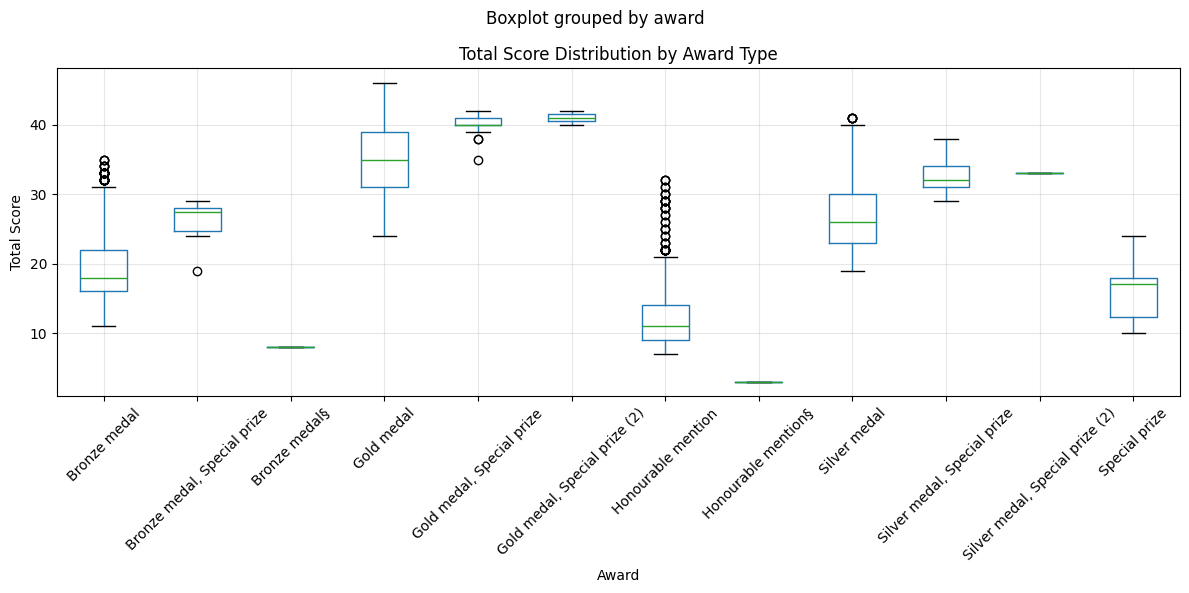

<Figure size 1200x600 with 0 Axes>

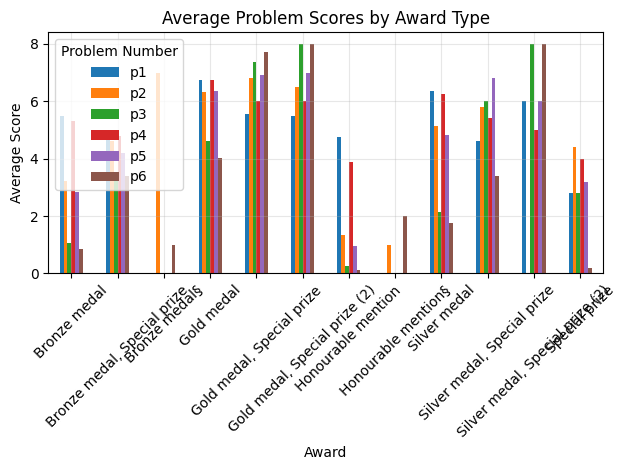

C:\Users\水草姐\AppData\Local\Temp\ipykernel_28504\3779763913.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_min_scores = df.groupby('year').apply(get_min_score)


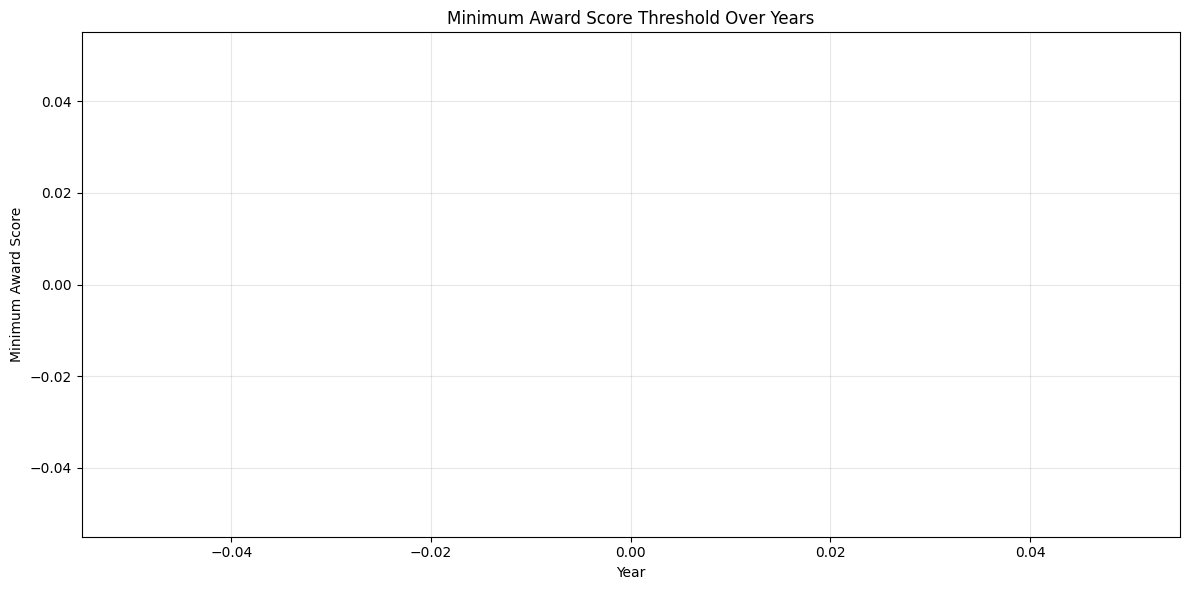

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init()

import matplotlib
matplotlib.rcParams['font.family'] = 'Source Han Sans CN'
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('individual_results_df.csv')

# 1. 不同奖项的总分分布
plt.figure(figsize=(12, 6))
df.boxplot(column='total', by='award', figsize=(12, 6))
plt.title('不同奖项的总分分布')
plt.xlabel('奖项')
plt.ylabel('总分')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 不同奖项在各题目上的表现
award_problem_scores = df.groupby('award')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean()

plt.figure(figsize=(12, 6))
award_problem_scores.plot(kind='bar')
plt.title('不同奖项的题目得分情况')
plt.xlabel('奖项')
plt.ylabel('平均分')
plt.legend(title='题目编号')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 历年获奖分数线变化
def get_award_thresholds(group):
    thresholds = {}
    for award in ['Gold Medal', 'Silver Medal', 'Bronze Medal']:
        scores = group[group['award'] == award]['total']
        if not scores.empty:
            thresholds[award] = scores.min()
    return pd.Series(thresholds)

yearly_thresholds = df.groupby('year').apply(get_award_thresholds)

plt.figure(figsize=(12, 6))
for award in ['Gold Medal', 'Silver Medal', 'Bronze Medal']:
    plt.plot(yearly_thresholds.index, yearly_thresholds[award], 
             label=award, marker='o')
plt.title('历年各奖项最低分数线变化')
plt.xlabel('年份')
plt.ylabel('最低得分')
plt.legend(title='奖项')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 奖项比例分析
award_counts = df.groupby(['year', 'award']).size().unstack(fill_value=0)
award_props = award_counts.div(award_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
award_props.plot(kind='area', stacked=True)
plt.title('历年各奖项比例变化')
plt.xlabel('年份')
plt.ylabel('比例(%)')
plt.legend(title='奖项')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 获奖者特征分析
# 计算各奖项的统计特征
award_stats = df.groupby('award').agg({
    'total': ['mean', 'std', 'min', 'max'],
    'problem_completion': ['mean'],  # 平均完成题目数
    'first_day_score': ['mean'],    # 第一天平均分
    'second_day_score': ['mean']    # 第二天平均分
}).round(2)

award_stats.columns = ['平均总分', '标准差', '最低分', '最高分', 
                      '平均完成题数', '第一天平均分', '第二天平均分']

print('\n各奖项统计特征：')
print(award_stats)

# 计算获奖难度变化
yearly_award_rates = (award_counts.div(award_counts.sum(axis=1), axis=0) * 100).round(2)
print('\n历年获奖比例变化（%）：')
print(yearly_award_rates.describe())
